In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = '../output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

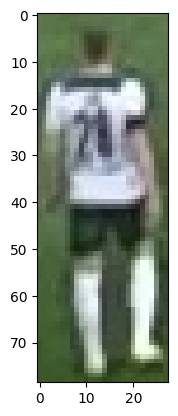

In [4]:
plt.imshow(image)
plt.show()


# Take the top half of the image

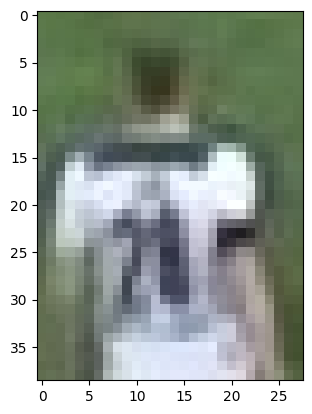

In [5]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)

#Cluster the image into 2 clusters

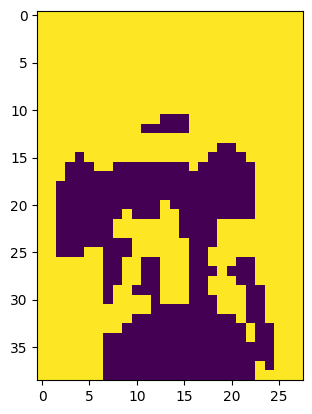

In [11]:
#Reshape the iamge to 2D
image_2d = top_half_image.reshape(-1,3)

#perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

labels = kmeans.labels_

#Reshape the labels back to the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#display the clustered image
plt.imshow(clustered_image)
plt.show()


In [12]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_clusters = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_clusters)

1


In [13]:
player_cluster = 1-non_player_clusters
print(player_cluster)

0


In [14]:
kmeans.cluster_centers_[player_cluster]

array([190.10089021, 195.70623145, 205.49554896])